In [1]:
import sys

from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import cv2

import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import k3d

ModuleNotFoundError: No module named 'autodistill_grounded_sam_2'

In [2]:
!pip install git+https://github.com/autodistill/autodistill-grounded-sam-2 rf_groundingdino -q


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/sfs/weka/scratch/rhm4nj/cral/.venv/lib64/python3.11/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/sfs/weka/scratch/rhm4nj/cral/.venv/lib64/python3.11/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/sfs/weka/scratch/rhm4nj/cral/.venv/lib64/python3.11/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "/tmp/pip-build-env-pygrqi6x/overlay/lib/python3.11/site-packages/setuptools

In [ ]:
classes = ['chair', 'table', 'board', 'floor']
base_model = GroundedSAM2(
    ontology=CaptionOntology(
        {c: c for c in classes}
    )
)

color_path = "/scratch/rhm4nj/cral/datasets/SUNRGBD/realsense/sh/2014_10_21-11_33_55-1311000041/image/0000075.jpg"
results = base_model.predict(color_path)

img = cv2.imread(color_path)
plot(
    image=img,
    classes=base_model.ontology.classes(),
    detections=results
)

# base_model.label("./imgs", extension=".jpg")

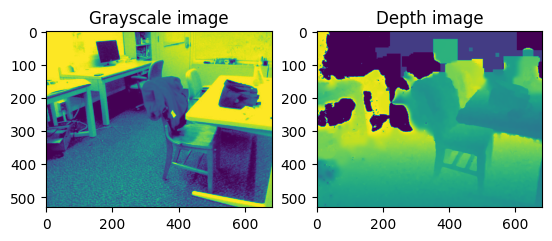

: 

In [ ]:
depth_path = "/scratch/rhm4nj/cral/datasets/SUNRGBD/kv2/kinect2data/000033_2014-05-26_14-51-07_260595134347_rgbf000133-resize/depth_bfx/0000133.png"
color_path = "/scratch/rhm4nj/cral/datasets/SUNRGBD/kv2/kinect2data/000033_2014-05-26_14-51-07_260595134347_rgbf000133-resize/image/0000133.jpg"

color_raw = o3d.io.read_image(color_path)
depth_raw = o3d.io.read_image(depth_path)

depth_raw_np = (np.asarray(depth_raw) / 10).astype(np.float32)  # Convert to meters and cast to float32
depth_raw = o3d.geometry.Image(depth_raw_np)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)

plt.subplot(1, 2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
my_intrinsic_str = '''691.584229 0.000000 362.777557
0.000000 691.584229 264.750000
0.000000 0.000000 1.000000
'''

my_intrinsic_values = np.fromstring(my_intrinsic_str, sep=' ').reshape(3, 3)

print(my_intrinsic_values)

width, height = np.asarray(rgbd_image.color).shape[:2]  # Replace with your image resolution if different
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
    width, height,
    my_intrinsic_values[0, 0], my_intrinsic_values[1, 1],  # f_x, f_y
    my_intrinsic_values[0, 2], my_intrinsic_values[1, 2]   # c_x, c_y
)


rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, camera_intrinsic)

In [ ]:
import k3d
import numpy as np

# Assuming pcd is your Open3D point cloud
points = np.asarray(pcd.points)
colors = np.asarray(pcd.colors)

colors = (colors * 255).astype(np.uint8)  # Convert from float [0, 1] to int [0, 255]
colors = (colors[:, 0] << 16 | colors[:, 1] << 8 | colors[:, 2]).astype(np.uint32)  # RGB format

# Create a K3D plot
plot = k3d.plot()
point_cloud = k3d.points(positions=points.astype(np.float32), 
                         colors=colors, 
                         point_size=0.01)
plot += point_cloud
plot.display()

NameError: name 'pcd' is not defined

In [ ]:
print(results.mask[0].shape)

img = cv2.imread(color_path)
print(img.shape)

(531, 681)
(531, 681, 3)
